# Loan Prediction (Practice Dataset)

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [169]:
train = pd.read_csv('/content/drive/My Drive/dataset_folder/train_ctrUa4K.csv')
test  = pd.read_csv('/content/drive/My Drive/dataset_folder/test_lAUu6dG.csv')
train.shape,test.shape

((614, 13), (367, 12))

In [170]:
train_original = train.copy()
test_original = test.copy()
display(train.head(2),test.head(2))

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [171]:
display(train.columns,test.columns) 

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [172]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

the below code gives the proportion of the data present in the target column

In [173]:
train.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

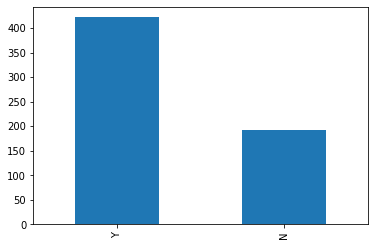

In [174]:
train.Loan_Status.value_counts().plot.bar()

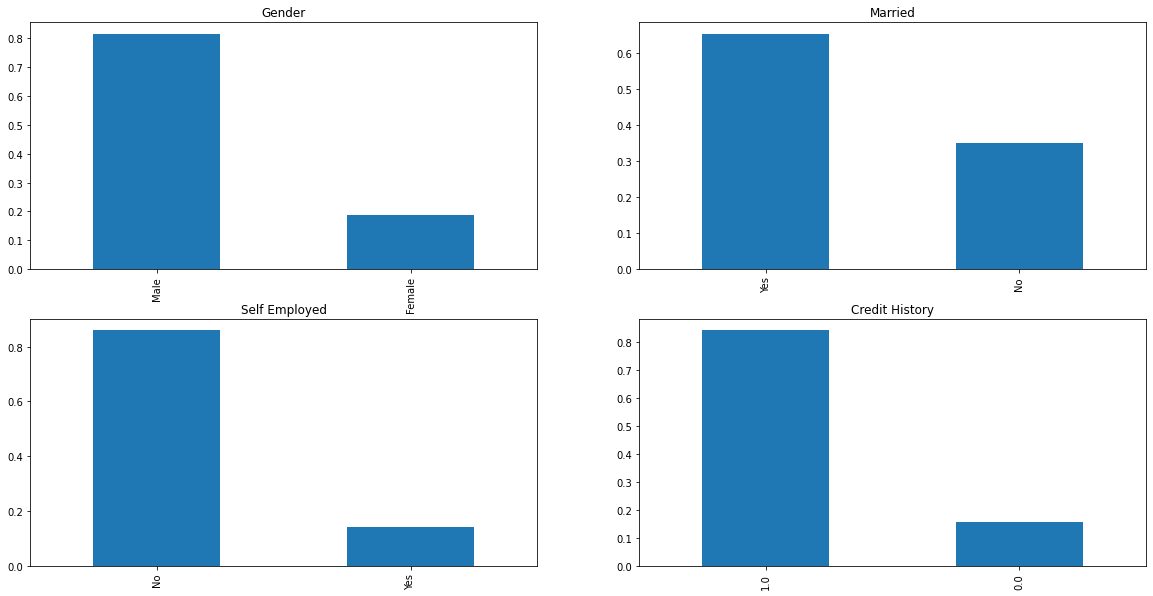

In [175]:
plt.figure(1)
plt.subplot(221)
train.Gender.value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train.Married.value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train.Self_Employed.value_counts(normalize=True).plot.bar(title='Self Employed')
plt.subplot(224)
train.Credit_History.value_counts(normalize=True).plot.bar(title='Credit History')
plt.show()

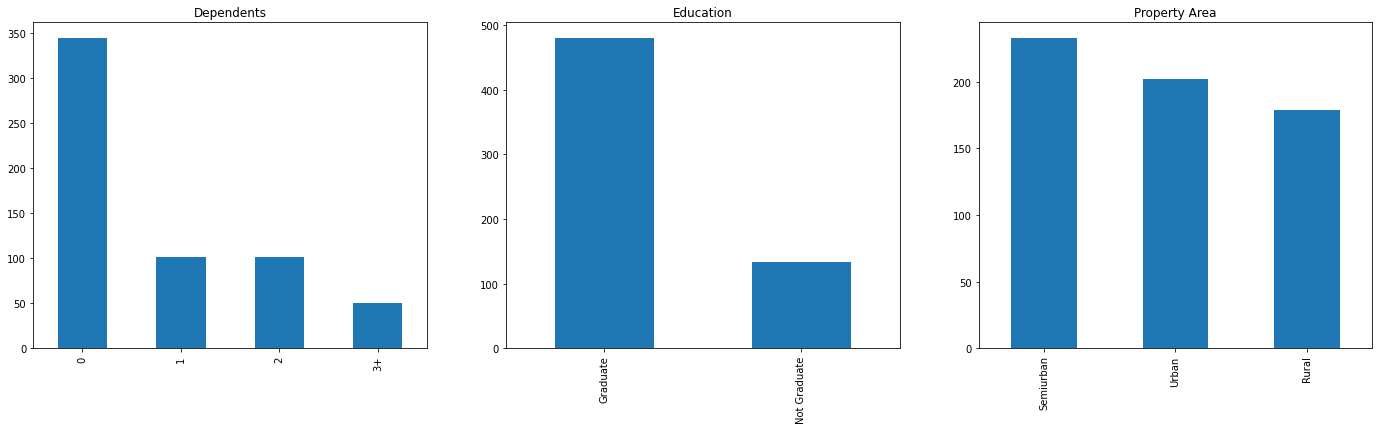

In [176]:
plt.figure(1)
plt.subplot(131)
train.Dependents.value_counts().plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train.Education.value_counts().plot.bar(figsize=(24,6),title='Education')
plt.subplot(133)
train.Property_Area.value_counts().plot.bar(figsize=(24,6),title='Property Area')

So from the below analysis it can be seen that most of the data in the Applicant_Income column lies within the 20000 range and thus the distribution is skewed. It has lot of outliers too.

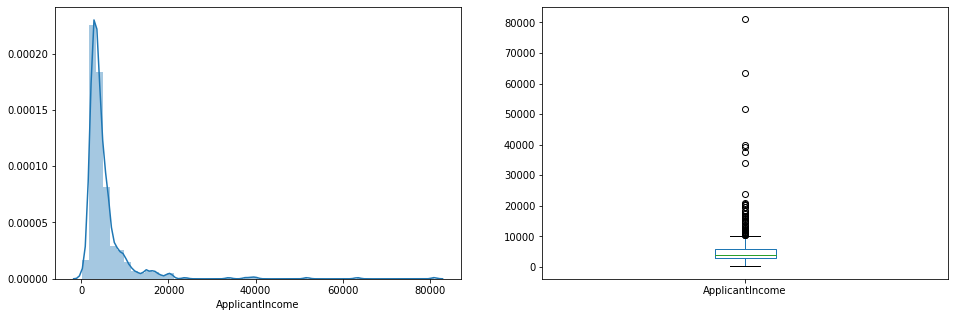

In [177]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train.ApplicantIncome)
plt.subplot(122)
train.ApplicantIncome.plot.box(figsize=(16,5))

The presence of the outliers may be due to the income generated by the graduate and non-graduate,let's see

Text(0.5, 0.98, '')

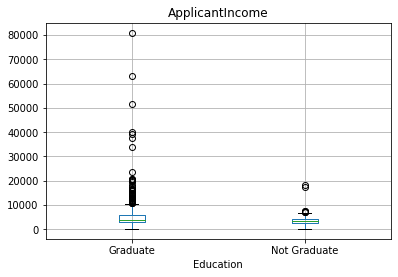

In [178]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle('')

Thus we can see from the above plot that due to the graduate people the income has outliers,let's check for the other numeric columns also

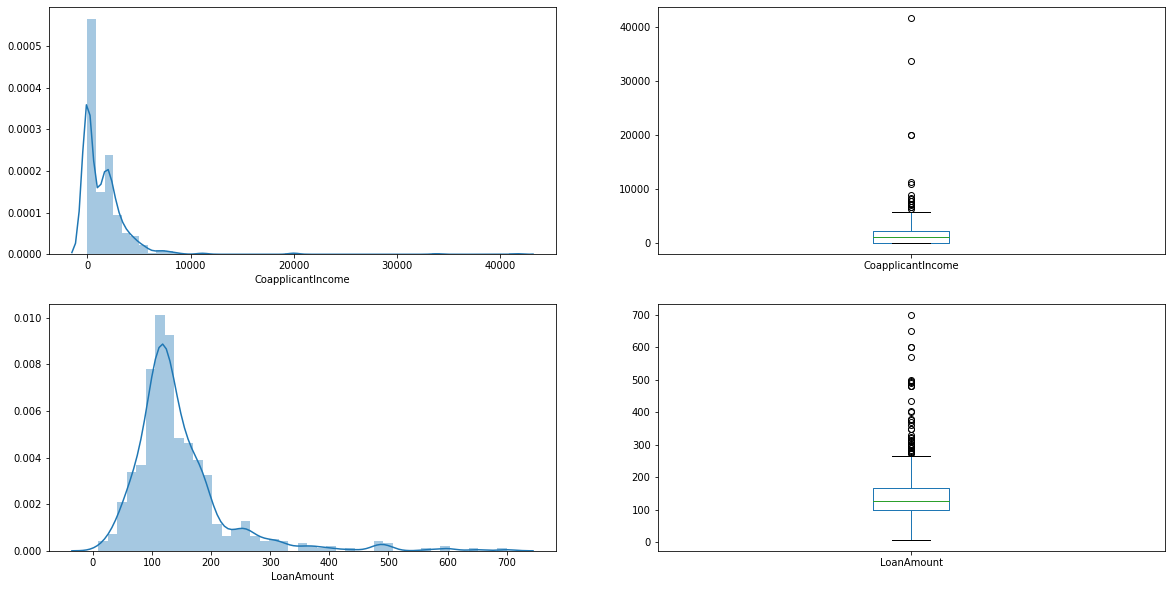

In [179]:
plt.figure(1)
plt.subplot(2,2,1)
sns.distplot(train.CoapplicantIncome)
plt.subplot(2,2,2)
train.CoapplicantIncome.plot.box(figsize=(20,10))
plt.subplot(2,2,3)
sns.distplot(train.LoanAmount)
plt.subplot(2,2,4)
train.LoanAmount.plot.box(figsize=(20,10))

from the above plots we can see that the CoApplicant Income also has a skewed distribution
and outliers but for LoanAmount the distribution is more or less normal but it also has outliers

Text(0.5, 0.98, '')

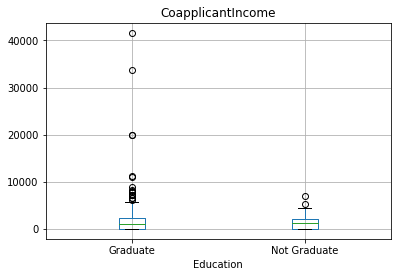

In [180]:
#it is also the same case as the Applicant one as the number of outliers is due to the 
#education difference in the population

train.boxplot(column='CoapplicantIncome',by='Education')
plt.suptitle('')

In [181]:
pd.crosstab(train.Gender,train.Loan_Status)

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [182]:
Gender1 = pd.crosstab(train.Gender,train.Loan_Status)

In [183]:
Gender1.columns

Index(['N', 'Y'], dtype='object', name='Loan_Status')

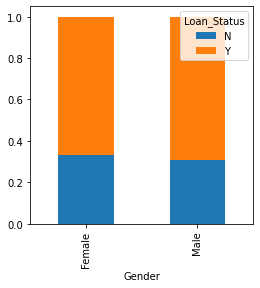

In [184]:
Gender1.div(Gender1.sum(axis=1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

In [185]:
pd.crosstab(train.Married,train.Loan_Status,normalize='index')

Loan_Status,N,Y
Married,,
No,0.370892,0.629108
Yes,0.283920,0.716080


In [186]:
pd.crosstab(train.Self_Employed,train.Loan_Status,normalize='index')

Loan_Status,N,Y
Self_Employed,,
No,0.314000,0.686000
Yes,0.317073,0.682927


In [187]:
#from the below we can see that when the applicant does not have a credit history then the chance
#of getting a loan is very less

pd.crosstab(train.Credit_History,train.Loan_Status,normalize='index')

Loan_Status,N,Y
Credit_History,,
0.0,0.921348,0.078652
1.0,0.204211,0.795789


from the below observation it can be seen that if married then the no proportion is less than the yes one, for non graduate the no proportion is slightly more but if the individual has a credit history then the yes proportion is pretty large than the no one

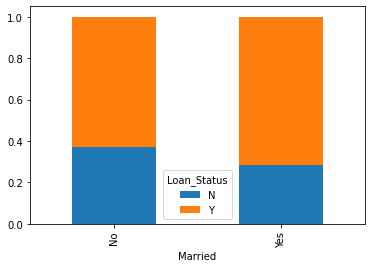

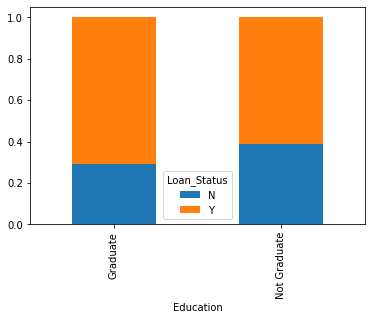

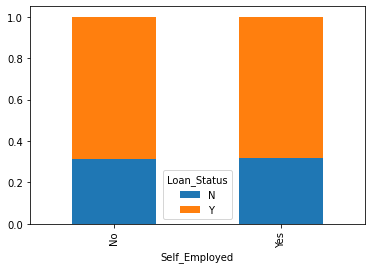

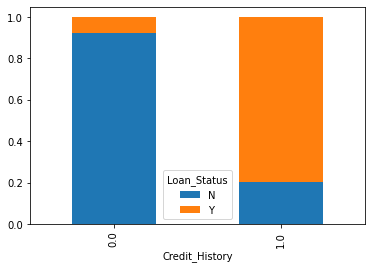

In [188]:
Education = pd.crosstab(train.Education,train.Loan_Status)
Self_Employed = pd.crosstab(train.Self_Employed,train.Loan_Status)
Credit_History = pd.crosstab(train.Credit_History,train.Loan_Status)
Married = pd.crosstab(train.Married,train.Loan_Status)


Married.div(Married.sum(1).astype(float),axis=0).plot.bar(stacked=True)
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

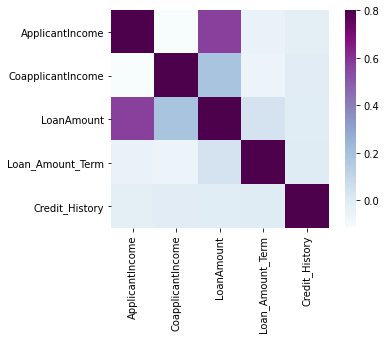

In [189]:
#LoanAmount and ApplicantIncome are very much correlated

plt.figure(1)
sns.heatmap(train.corr(),vmax=0.8,square=True,cmap='BuPu')

now let's fill the missing values and look at the distribution of the outliers

In [190]:
#there are null values in some of the columns and thus we have to replace them
 
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [191]:
train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [192]:
#for categorical variables we can use mode function to replace the missing values.
#for numerical variables we can use the mean or median function to replace the missing values

cat_cols = ['Gender','Married','Dependents','Self_Employed','Credit_History','Loan_Amount_Term']

for i in cat_cols:
  train[i].fillna(train[i].mode()[0],inplace=True)
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [193]:
#now LoanAmount is a numerical column and we have to deal with the missing values of this column 
#a little differently as it has continuous values
#for continuous columns always use mean or median for the null imputation and if the column contains 
#outliers then it is better to use median than mean

train.LoanAmount.nunique()

203

In [194]:
train.shape[0]

614

In [195]:
train.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [196]:
train.LoanAmount.fillna(train.LoanAmount.median(),inplace=True)
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [197]:
#with the below code I transformed the values in the LoanAmount column so that there is a reduction
#in the std and the min and max are in the same range, thus reducing the situation of having an outlier 
#and making the distribution a normal one

train.LoanAmount = np.log(train.LoanAmount)
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,4.852030,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,360.0,1.0,Urban,Y


In [198]:
train.LoanAmount.describe()

count    614.000000
mean       4.857250
std        0.495996
min        2.197225
25%        4.607658
50%        4.852030
75%        5.104426
max        6.551080
Name: LoanAmount, dtype: float64

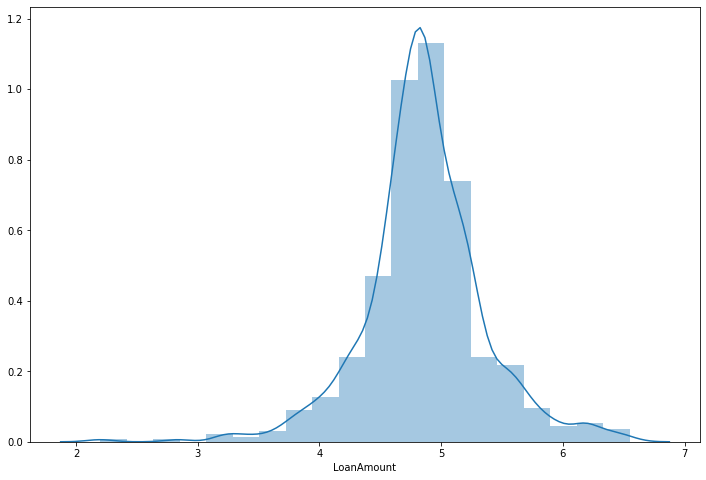

In [199]:
#from the below plot we can see that the distribution is more or less normal and thus the data is 
#generalised in this column.If the distribution is very much varied then the models which use 
#distance or some kind of parameter for predicting the output then the prediction would be wrong or 
#not much accurate

plt.figure(1,figsize=(12,8))
sns.distplot(train.LoanAmount,bins=20)

In [200]:
#now the same imputation should be done on the test dataset also 

test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [201]:
#this is for the categorical variables for the test dataset

cat_cols = ['Gender','Married','Dependents','Self_Employed','Credit_History','Loan_Amount_Term']

for i in cat_cols:
  test[i].fillna(test[i].mode()[0],inplace=True)
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [202]:
#now loanamount is a numerical variable just like in train set

test.LoanAmount.fillna(test.LoanAmount.median(),inplace=True)
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [203]:
#we can see that the variation in the LoanAmount for the test set is just like for the 
#train set,we have to transform to reduce the variation.

test.LoanAmount.describe()

count    367.000000
mean     135.980926
std       60.959739
min       28.000000
25%      101.000000
50%      125.000000
75%      157.500000
max      550.000000
Name: LoanAmount, dtype: float64

In [204]:
test.LoanAmount = np.log(test.LoanAmount)
test.LoanAmount.describe()

count    367.000000
mean       4.827019
std        0.416189
min        3.332205
25%        4.615121
50%        4.828314
75%        5.059420
max        6.309918
Name: LoanAmount, dtype: float64

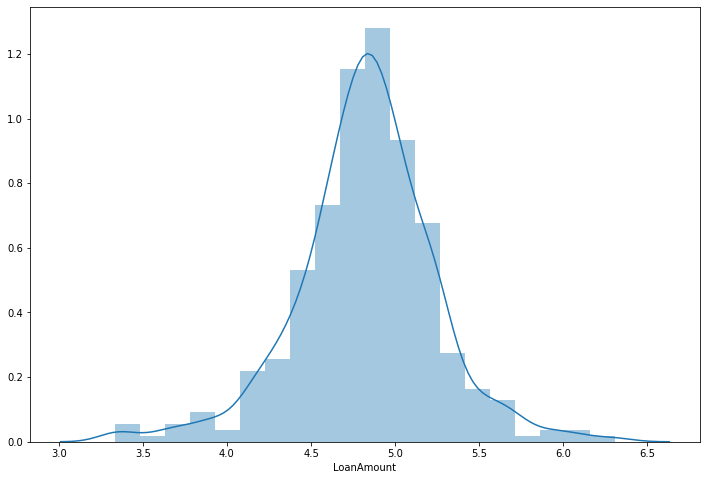

In [205]:
#we can see from the plot below the distribution is more or less normal

plt.figure(1,figsize=(12,8))
sns.distplot(test.LoanAmount,bins=20)

In [206]:
#let's display the two datasets for one more time to get a better look at what columns to use 
#and what not to use

display(train.head(2),test.head(2))

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,4.85203,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,4.85203,360.0,1.0,Rural,N


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,4.700480,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,4.836282,360.0,1.0,Urban


In [207]:
#always remove any id column present in the dataset as those columns have unique values and thus 
#cannot be used in the modelling of the data

train.drop('Loan_ID',axis=1,inplace=True)
test.drop('Loan_ID',axis=1,inplace=True)
train.shape,test.shape

((614, 12), (367, 11))

In [208]:
#making new features based on the previous features and then trying them in the model preparation
#feature engineering

train['total_income'] = train.ApplicantIncome + train.CoapplicantIncome
train['emi'] = train.LoanAmount/train.Loan_Amount_Term
train['balance'] = train.total_income-(train.emi*1000)
test['total_income'] = test.ApplicantIncome + test.CoapplicantIncome
test['emi'] = test.LoanAmount/test.Loan_Amount_Term
test['balance'] = test.total_income-(test.emi*1000)

In [209]:
#taking the logarithm of the features as the variation in the features are a lot
#and most of the models face difficulty predicting the results due to this

train.total_income = np.log(train.total_income)
train.emi = np.log(train.emi)
train.balance = np.log(train.balance)
test.total_income = np.log(test.total_income)
test.emi = np.log(test.emi)
test.balance = np.log(test.balance)

In [210]:
#dropping the columns which were previously present as they will be highly correlated to the
#features that are generated now

train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1,inplace=True)
test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1,inplace=True)

In [211]:
#splitting the data into x,y for making predictions

x = train.drop('Loan_Status',1)
y = train.Loan_Status
x.shape,y.shape

((614, 14), (614,))

In [212]:
#doing one-hot-encoding on the columns that have catagorical values 
#both on the train and the test set

train = pd.get_dummies(train)
test = pd.get_dummies(test)
x = pd.get_dummies(x)

In [213]:
#viewing the dimension of the dataframe x

x.shape

(614, 23)

In [214]:
#this import statements imports a library that can be used to split data for
#training and testing purpose

from sklearn.model_selection import train_test_split

In [215]:
#dividing the data into train and validation set
#the training of the model will be done on the train set and the validation of the 
#model will be done on the val set.

x_train,x_val,y_train,y_val  = train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((429, 23), (185, 23), (429,), (185,))

In [216]:
#importing the necessary libraries for making models and use them as classifiers and importing 
#the metrics for evaluating the data

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [217]:
#making a model dictionary which will store all the models and the keys for taking out the
#models

model_dict = {'lr': LogisticRegression(),
              'dt': DecisionTreeClassifier(max_depth=100,min_samples_leaf=100),
              'gbr': GradientBoostingClassifier(),
              'rfc': RandomForestClassifier(),
              'svc':SVC()}
score_dict={}

In [218]:
#running a for loop through the model_dict to train each model across the train data 
#and evaluate on the val data.

for key,value in model_dict.items():
  model = value
  model.fit(x_train,y_train)
  y_pred = model.predict(x_val)
  score_dict[key] = accuracy_score(y_val,y_pred)
score_dict

{'dt': 0.7243243243243244,
 'gbr': 0.8,
 'lr': 0.7945945945945946,
 'rfc': 0.8108108108108109,
 'svc': 0.7243243243243244}

In [219]:
#taking the model with the maximum score and then using it further

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [220]:
#getting the predictions and then checking the accuracy

y_pred = model.predict(x_val)
accuracy_score(y_val,y_pred)

0.7945945945945946

In [221]:
test_pred = model.predict(test)

from the below code the model then produces result on the test data and then produce a submission file for submission.

In [222]:
submission = pd.read_csv('/content/drive/My Drive/dataset_folder/sample_submission_49d68Cx.csv')
submission.head(2)

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N


In [223]:
submission.Loan_ID = test_original.Loan_ID
submission.Loan_Status = test_pred
submission.head(2)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y


In [224]:
submission.to_csv(r'/content/drive/My Drive/dataset_folder/loan_prediction_submission_lr_1.csv',index=False)